Probe Lenght is   [20.]
Probe Type  is   ['BUR']
lr_Train r^2 is   0.9985459576527734
lr_Train real RMSE is  : 0.005108381125752521
lr_eval r^2 is   0.8820744358237407
lr_eval RMSE is  : 0.09740641610599689
lr_final  r^2 is   0.985315982299063
lr_Final RMSE is  : 0.01843322706193107
intercept 1.390367420585592
wieghts coe wi Ka       -0.007577
v0        0.000498
v3       -0.000502
vf       -0.000623
vr       -0.000121
sf        0.048230
ECtopp    0.694863
dtype: float64


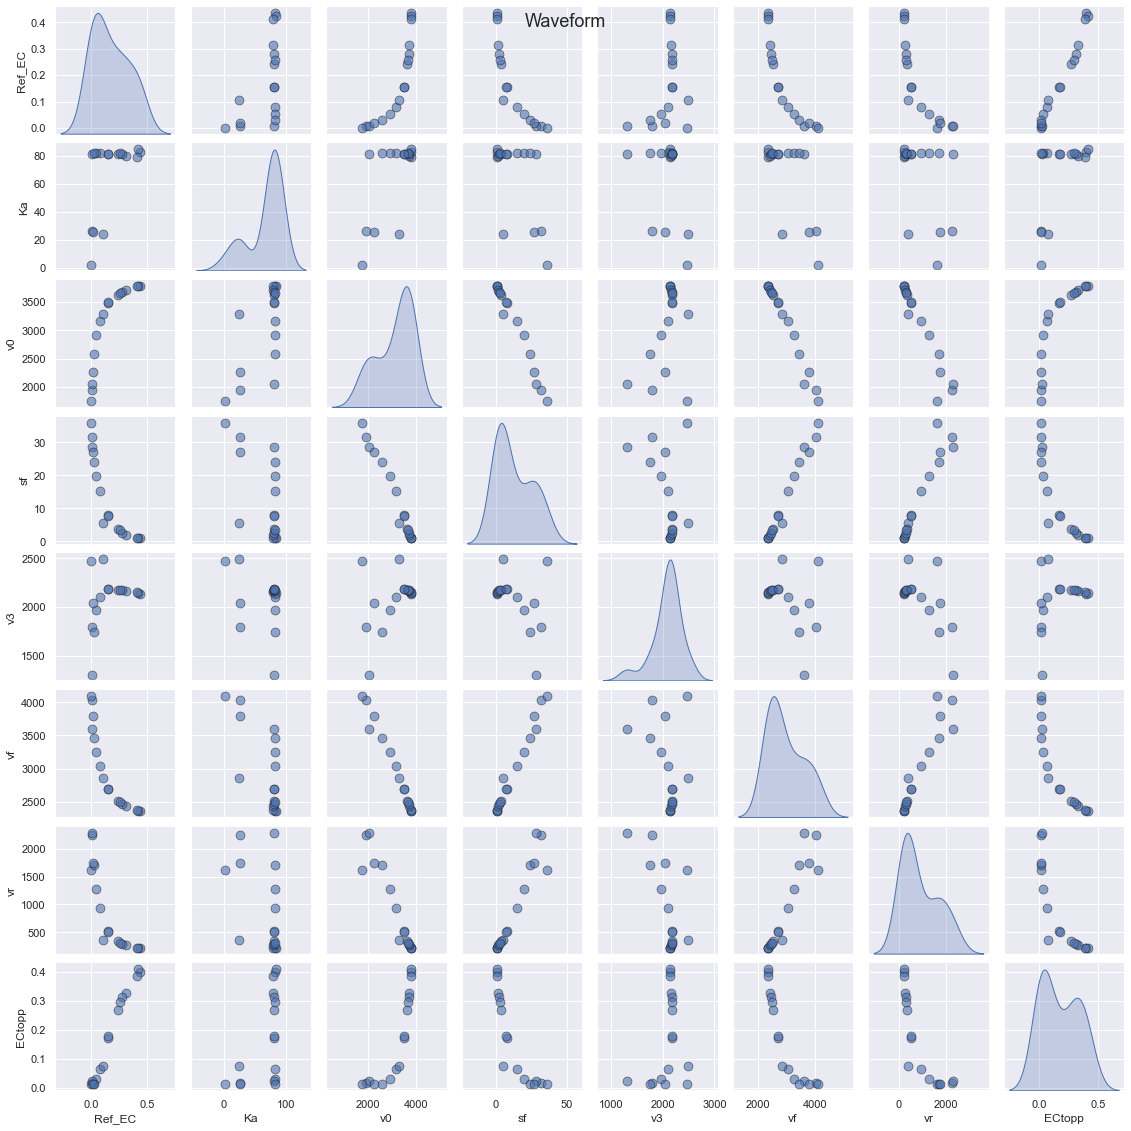

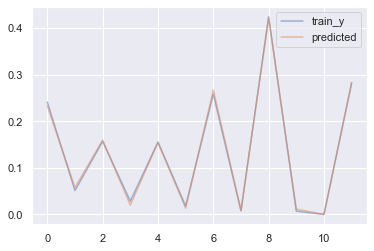

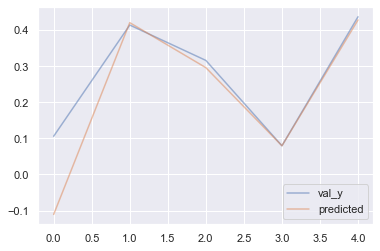

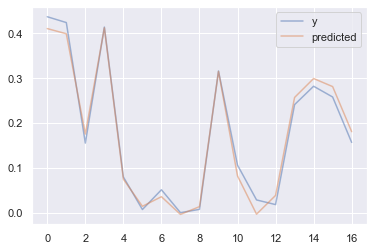

In [1]:
#Enter Probe tine lenght and type
tine_lenght = 20
probe_type = 'BUR'



import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

mod_data = pd.read_csv('model_input.csv')

#clean up data

mod_data.drop('sol_number', axis=1, inplace=True)
mod_data.drop('Date', axis=1, inplace=True)
mod_data.drop('Ka_trace', axis=1, inplace=True)
mod_data.drop('Zero_Time', axis=1, inplace=True)
mod_data.drop('t_s', axis=1, inplace=True)
mod_data.drop('t_f', axis=1, inplace=True)
mod_data.drop('Volumetric', axis=1, inplace=True)
mod_data.drop('int_time', axis=1, inplace=True)
mod_data.drop('v1a', axis=1, inplace=True)
mod_data.drop('v1', axis=1, inplace=True)
mod_data.drop('t_dif', axis=1, inplace=True)
mod_data.drop('Probee_index', axis=1, inplace=True)


mod_dfa = mod_data.loc[(mod_data['Probe_L']== tine_lenght) & (mod_data['Probe_type']== probe_type)]  
mod_dfa.reset_index(drop = True, inplace = True)
mod_dfb = mod_dfa.copy()

#mod_dfb.drop(index=9, inplace = True)
#mod_dfb.reset_index(drop=True, inplace=True)



print("Probe Lenght is  ", mod_dfb.Probe_L.unique())
print("Probe Type  is  ", mod_dfb.Probe_type.unique())



#make Pairplot
sns.pairplot(mod_dfb, 
             vars = ['Ref_EC','Ka', 'v0', 'sf', 'v3', 'vf', 'vr','ECtopp'], 
             #hue = 'L', change color based on a class
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 2);
# Title 
plt.suptitle('Waveform', 
             size = 18);



#prepair data for Model
column_names = ['Ka','v0','v3', 'vf', 'vr', 'sf','ECtopp']
X = mod_dfb[column_names]
y = mod_dfb['Ref_EC']


# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 5, random_state=4)



#LinearRegression

#model Training set
lr_model_train = LinearRegression(fit_intercept=True)
lr_model_train.fit(train_X, train_y)
lr_train_predict = lr_model_train.predict(train_X)
lr_train_df = pd.DataFrame()
lr_train_df['train_y'] = train_y
lr_train_df['predicted'] = lr_train_predict
lr_train_df.reset_index(drop=True, inplace=True)
lr_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("lr_Train r^2 is  ",(lr_train_df['train_y'].corr(lr_train_df['predicted']))**2)
print("lr_Train real RMSE is  :",((lr_train_df['predicted'] - lr_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate error
#lr_model_eval = LinearRegression(fit_intercept=True)
#lr_model_eval.fit(train_X, train_y)
lr_eval_predict = lr_model_train.predict(val_X)
#lr_eval_mae = mean_absolute_error(lr_eval_predict, val_y)

#print("Test MAE is ", lr_eval_mae)

lr_eval_df = pd.DataFrame()
lr_eval_df['val_y'] = val_y
lr_eval_df['predicted'] = lr_eval_predict
lr_eval_df.reset_index(drop=True, inplace=True)
lr_eval_df[['val_y', 'predicted']].plot(alpha=0.5);

print("lr_eval r^2 is  ",(lr_eval_df['val_y'].corr(lr_eval_df['predicted']))**2)
print("lr_eval RMSE is  :",((lr_eval_df['predicted'] - lr_eval_df['val_y']) ** 2).mean() ** .5)


#model all for production
lr_model_final = LinearRegression(fit_intercept=True)
lr_model_final.fit(X, y)
lr_final_predict = lr_model_final.predict(X)
lr_final_df = pd.DataFrame()
lr_final_df['y'] = y
lr_final_df['predicted'] = lr_final_predict
lr_final_df.reset_index(drop=True, inplace=True)
lr_final_df[['y', 'predicted']].plot(alpha=0.5);

print("lr_final  r^2 is  ",(lr_final_df['y'].corr(lr_final_df['predicted']))**2)
print("lr_Final RMSE is  :",((lr_final_df['predicted'] - lr_final_df['y']) ** 2).mean() ** .5)





params = pd.Series(lr_model_final.coef_, index=X.columns)
print("intercept", lr_model_final.intercept_)
print("wieghts coe wi", params)

 



In [3]:
mod_dfb

,ch_sample,Ref_EC,Probe_type,Probe_L,L,Ka,v0,sf,v3,vf,vr,EC_Dalton,ECtopp,Unnamed: 25
0,[2535],0.43700,BUR,20.0,0.2,82.541049,3787,1.053383,2135,2359,224,0.271806,0.397968,NaN
1,[2534],0.42400,BUR,20.0,0.2,84.513744,3787,1.068421,2139,2363,224,0.275263,0.408242,NaN
2,[2531],0.15520,BUR,20.0,0.2,81.076815,3490,7.906015,2182,2699,517,0.172051,0.170656,NaN
3,[2533],0.41400,BUR,20.0,0.2,78.665544,3779,1.071429,2150,2371,221,0.267759,0.383636,NaN
4,[2530],0.07960,BUR,20.0,0.2,81.671773,3167,15.358647,2099,3039,940,0.096337,0.065223,NaN
5,[2528],0.00700,BUR,20.0,0.2,26.004591,1947,31.609023,1791,4034,2243,0.000000,0.014990,NaN
6,[2529],0.05110,BUR,20.0,0.2,81.725968,2918,19.878195,1967,3251,1284,0.051167,0.029245,NaN
7,[2527],0.00000,BUR,20.0,0.2,2.472478,1747,35.921805,2470,4095,1625,0.008737,0.013169,NaN
8,[2525],0.00735,BUR,20.0,0.2,81.401068,2046,28.614286,1306,3598,2292,0.000000,0.022404,NaN
9,[2641],0.31600,BUR,20.0,0.2,79.545451,3715,1.869925,2166,2439,273,0.245122,0.325344,NaN


In [98]:
mod_dfb.drop(index=9, inplace = True)
mod_dfb.reset_index(drop=True, inplace=True)

mod_dfb

,index,ch_sample,Ref_EC,Probe_type,Probe_L,L,Ka,v0,sf,v3,vf,vr,EC_Dalton,ECtopp
0,18,[2507],0.43700,BUR,7.8,0.078,80.749755,3643,3.637594,2298,2527,229,1.050503,1.067253
1,19,[2506],0.42400,BUR,7.8,0.078,80.473688,3638,3.764662,2294,2535,241,1.032592,1.049328
2,20,[2505],0.41400,BUR,7.8,0.078,80.887966,3630,4.260902,2294,2547,253,1.020384,1.037025
3,21,[2504],0.15520,BUR,7.8,0.078,80.818846,3214,13.947368,2087,3003,916,0.597669,0.612470
4,22,[2502],0.05110,BUR,7.8,0.078,79.991707,2574,21.992481,1567,3539,1972,0.274210,0.292556
5,23,[2503],0.07960,BUR,7.8,0.078,80.198093,2822,19.369173,1786,3354,1568,0.384223,0.400405
6,24,[2500],0.00735,BUR,7.8,0.078,78.282167,1898,25.890977,959,3895,2936,0.003758,0.031101
7,25,[2501],0.00700,BUR,7.8,0.078,26.446270,1838,30.582707,1403,3999,2596,0.090252,0.092352
8,26,[2499],0.00010,BUR,7.8,0.078,1.158159,1722,39.709774,1831,4051,2220,0.034358,0.031124
9,61,[2647],0.31600,BUR,7.8,0.078,77.874625,3527,6.809023,2271,2663,392,0.090252,0.092352


In [24]:
print("lr val redictions", lr_eval_predict)
print("val_y", val_y)

lr val redictions [0.34106341 0.07170745 0.29325563 0.35902263]
val_y 9     0.5920
4     0.0511
16    0.2580
0     0.4370
Name: Ref_EC, dtype: float64


rf_Train r^2 is   0.9929491981145347
rf_Train RMSE is  : 0.01789122714779975
rf_val r^2 is   0.9920286886686395
rf_val RMSE is  : 0.029838174547884195
rf_final  r^2 is   0.9976048372534485
rf_Final RMSE is  : 0.009639972130482025


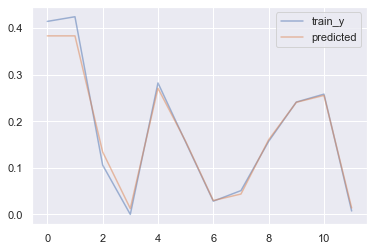

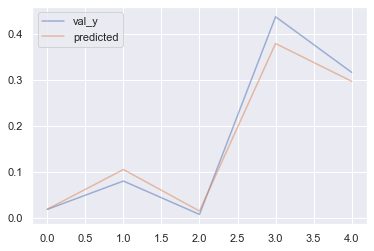

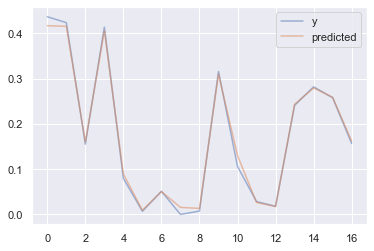

In [5]:
#Random Forest



#prepair data for Model
column_names = ['Ka', 'v0', 'v3', 'vf', 'vr', 'sf', 'ECtopp']
X = mod_dfb[column_names]
y = mod_dfb['Ref_EC']

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 5, random_state=2)
###############

#Random Forest Train

rf_model_train = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
# Fit Model
rf_model_train.fit(train_X, train_y)
rf_train_predict = rf_model_train.predict(train_X)

rf_train_df = pd.DataFrame()
rf_train_df['train_y'] = train_y
rf_train_df['predicted'] = rf_train_predict
rf_train_df.reset_index(drop=True, inplace=True)
rf_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("rf_Train r^2 is  ",(rf_train_df['train_y'].corr(rf_train_df['predicted']))**2)
print("rf_Train RMSE is  :",((rf_train_df['predicted'] - rf_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate mean absolute error
rf_val_predictions = rf_model_train.predict(val_X)

rf_val_df = pd.DataFrame()
rf_val_df['val_y'] = val_y
rf_val_df['predicted'] = rf_val_predictions
rf_val_df.reset_index(drop=True, inplace=True)
rf_val_df[['val_y', 'predicted']].plot(alpha=0.5);

print("rf_val r^2 is  ",(rf_val_df['val_y'].corr(rf_val_df['predicted']))**2)
print("rf_val RMSE is  :",((rf_val_df['predicted'] - rf_val_df['val_y']) ** 2).mean() ** .5)


#model all for production
rf_model_final = RandomForestRegressor(max_leaf_nodes=100, random_state=1)

rf_model_final.fit(X, y)
rf_final_predict = rf_model_final.predict(X)
rf_final_df = pd.DataFrame()
rf_final_df['y'] = y
rf_final_df['predicted'] = rf_final_predict
rf_final_df.reset_index(drop=True, inplace=True)
rf_final_df[['y', 'predicted']].plot(alpha=0.5);

print("rf_final  r^2 is  ",(rf_final_df['y'].corr(rf_final_df['predicted']))**2)
print("rf_Final RMSE is  :",((rf_final_df['predicted'] - rf_final_df['y']) ** 2).mean() ** .5)


https://realpython.com/train-test-split-python-data/
https://medium.com/the-code-monster/split-a-dataset-into-train-and-test-datasets-using-sk-learn-acc7fd1802e0


In [55]:
print((lr_eval_df['val_y'].corr(lr_eval_df['predicted']))**2)

0.7786438116910392


In [ ]:
#Random Forest





